In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_file, show
import pandas
from bokeh.models import DataRange1d, PanTool, ResetTool, WheelZoomTool, HoverTool, LassoSelectTool, BoxSelectTool, SaveTool, Legend

In [31]:
# change dir to access preprocessed data

import os
print(os.getcwd())
os.chdir("../../../")
os.chdir("preprocessing code/Migratiestromen/Africa")
print(os.getcwd())

C:\Users\Midas\Documents\GitHub\DataProcessing1\plot code\Migratiestromen\Africa
C:\Users\Midas\Documents\GitHub\DataProcessing1\preprocessing code\Migratiestromen\Africa


In [32]:
raw_data = pd.read_csv('data_africa.csv')
df = pd.DataFrame(raw_data)

In [33]:
# selecteer voor een #input_data de #country_of_residence van #year1 tot en met #year2

def select_plot(input_data, country_of_residence, origin, year1, year2):
    input_data = input_data.loc[input_data['Country of residence'] == country_of_residence]
    input_data = input_data.loc[input_data['Origin'] == origin]
    input_data = input_data.loc[(input_data['YearMonth'] > year1) & (input_data['YearMonth'] < year2)]
    return input_data

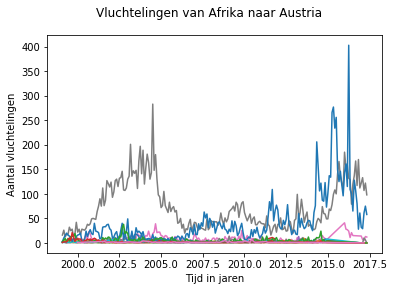

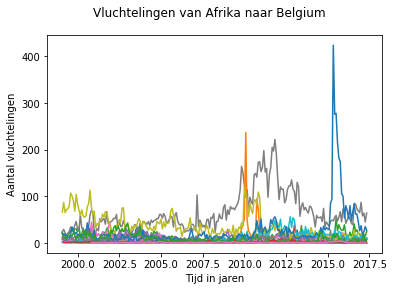

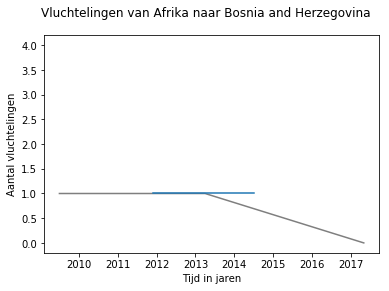

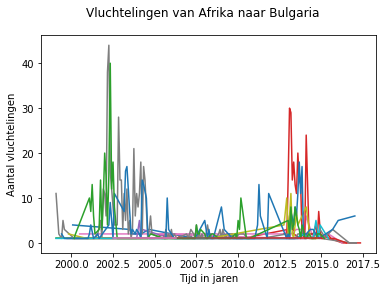

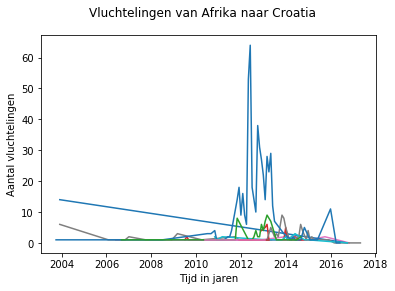

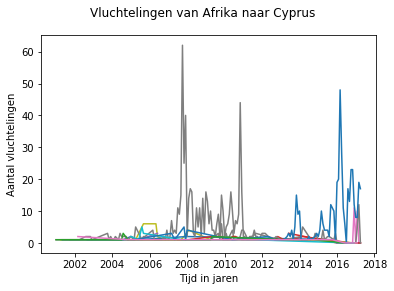

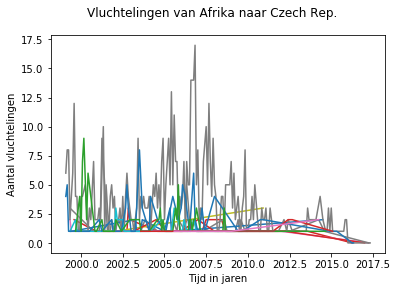

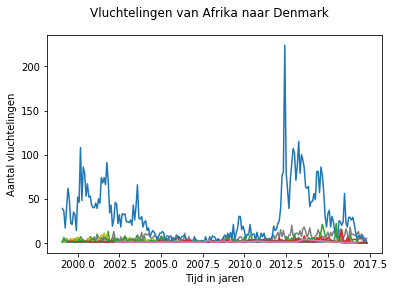

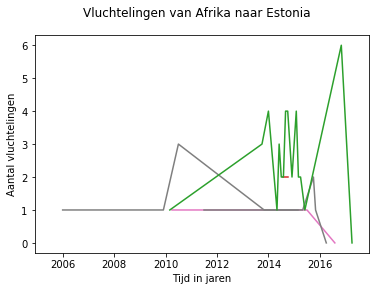

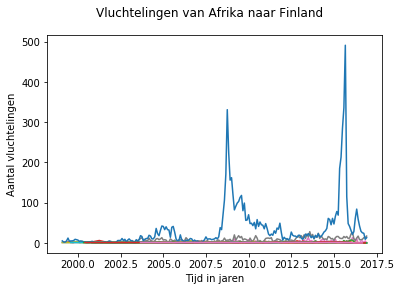

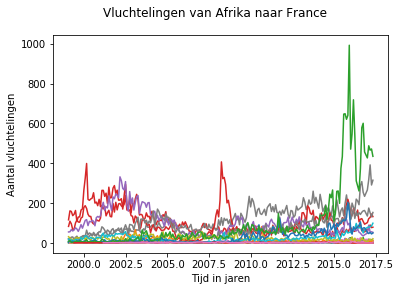

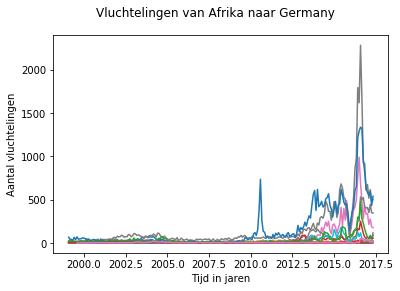

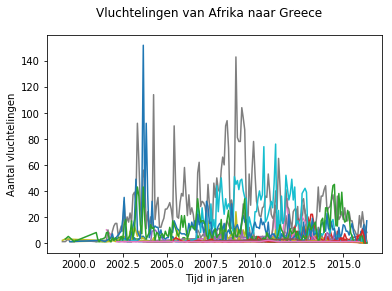

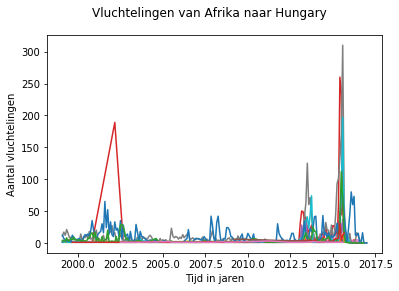

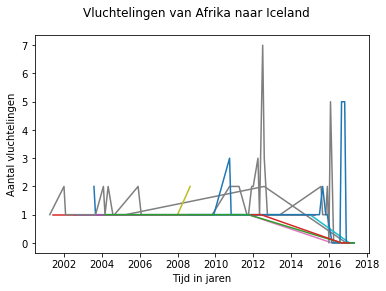

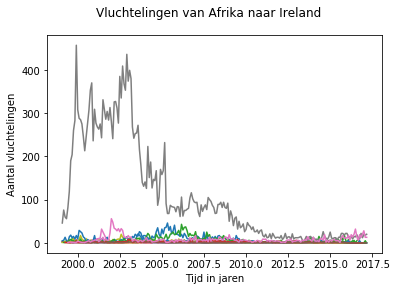

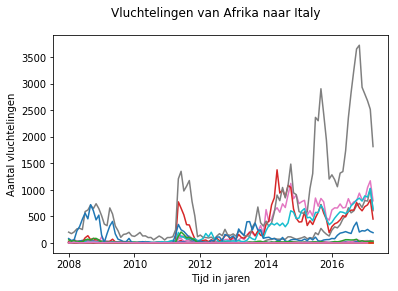

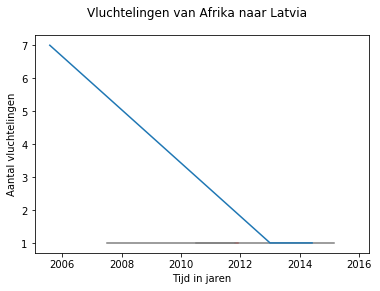

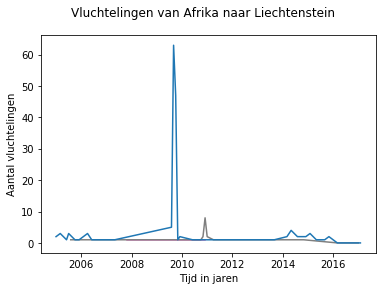

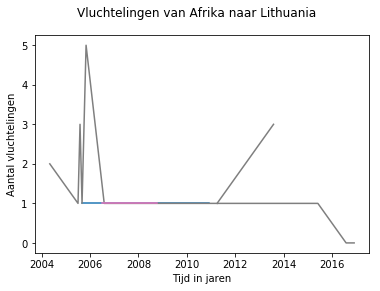

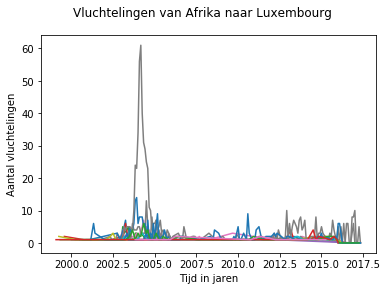

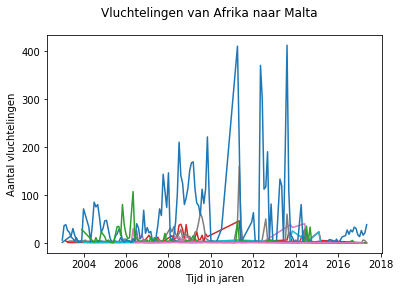

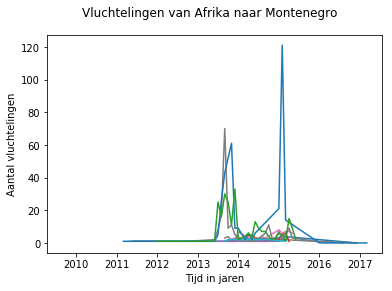

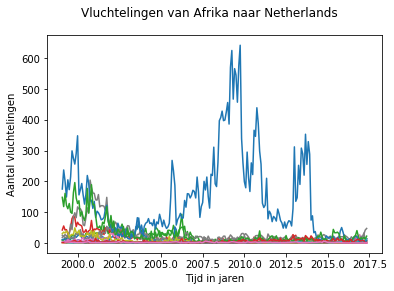

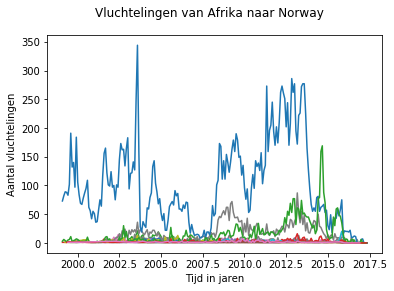

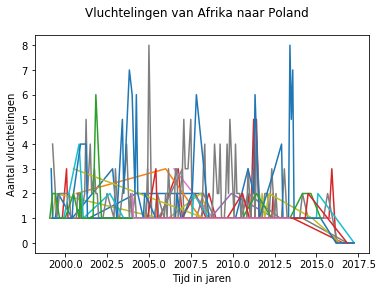

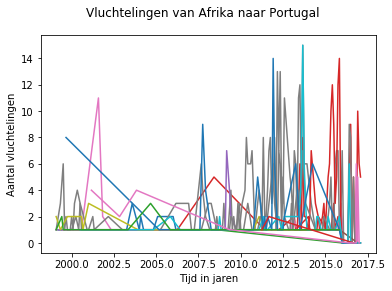

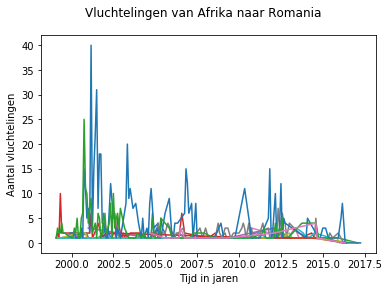

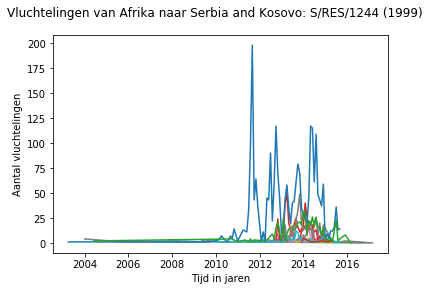

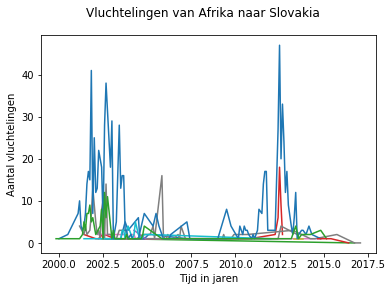

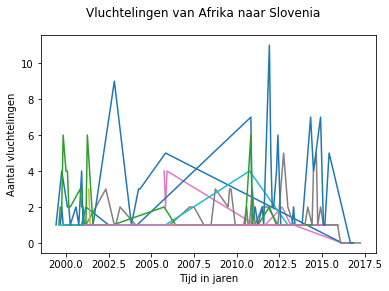

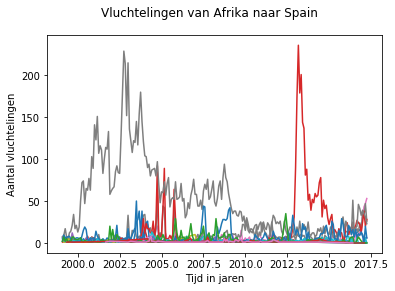

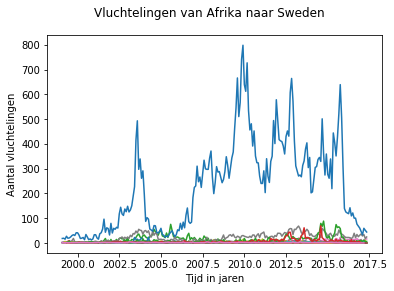

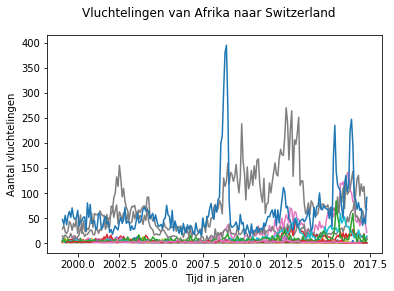

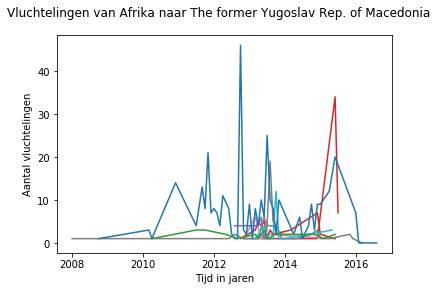

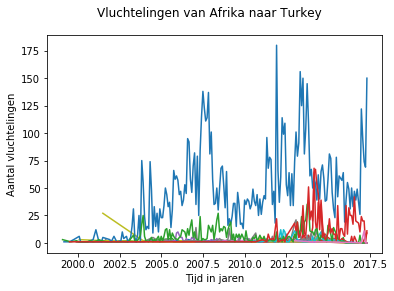

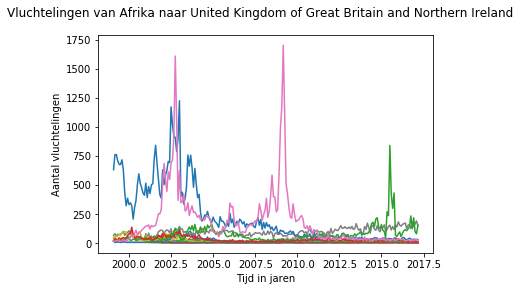

In [ ]:
african_countries = ["Cabo Verde", "Central African Rep.","Burundi", "Congo", "Djibouti", "Ehtiopia", "Gambia", "Guinea", 
                     "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi","Mali", "Mauritania", "Mozambique", "Niger", 
                     "Nigeria" , "Rwanda", "Senegal", "Somalia", "South Sudan", "Sudan", "Uganda", "Tanzania", "Zambia", 
                     "Zimbabwe"]

european_countries =['Austria','Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia','Cyprus',
                    'Czech Rep.', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
                    'Hungary', 'Iceland', 'Ireland','Italy','Latvia', 'Liechtenstein','Lithuania',
                     'Luxembourg','Malta','Montenegro','Netherlands', 'Norway','Poland','Portugal',
                     'Romania', 'Serbia and Kosovo: S/RES/1244 (1999)','Slovakia','Slovenia',
                     'Spain','Sweden','Switzerland', 'The former Yugoslav Rep. of Macedonia',
                     'Turkey','United Kingdom of Great Britain and Northern Ireland']


for country_of_residence in european_countries:
    plt.figure() 
    
    
    for origin in african_countries:
        plt.plot(select_plot(df, country_of_residence, origin, 1999, 2017.416666666667)['YearMonth'],select_plot(df, country_of_residence, origin, 1999, 2017.5)['Values'],label=origin)
        
    plt.xlabel('Tijd in jaren')
    plt.ylabel('Aantal vluchtelingen')
    plt.suptitle("Vluchtelingen van Afrika naar {}".format(country_of_residence))
    plt.show()


In [ ]:
# Create a new csv with the amount of refugees per timestep for every country

## Do not run, load time 1 hour !!!!!!!!!!!!!!!

start_date = 1999
end_date = 1999 + 1/12

df1 = pd.DataFrame([], columns=list('ABC'))

for i in range(222):

    for origin in african_countries:
        count = 0

        for country_of_residence in european_countries:

            for value in select_plot(df, country_of_residence, origin, start_date, end_date)['Values']:
                count += value
                
                
        df2 = pd.DataFrame([[origin, start_date, count]], columns=list('ABC'))
        df1 = df1.append(df2)
                
    start_date += round(1/12,11)
    end_date += 1/12 + 0.00000000001

    
df1.columns = ['Origin','Timestamp','Value']

df1[['Origin','Timestamp','Value']].to_csv('refugees_africa_per_timestamp.csv', index=False)

In [17]:
# selecteer voor een #input_data de #origin van #year1 tot en met #year2

def select_plot1(input_data,origin, year1, year2):
    input_data = input_data.loc[input_data['Origin'] == origin]
    input_data = input_data.loc[(input_data['Timestamp'] > year1) & (input_data['Timestamp'] < year2)]
    return input_data

In [18]:
# import new dataframe with refugees to europe

raw_data = pd.read_csv('refugees_africa_per_timestamp.csv')
df1 = pd.DataFrame(raw_data)

In [19]:
print(os.getcwd())
os.chdir("../../../")
os.chdir("plot code/Migratiestromen/Africa")
print(os.getcwd())

C:\Users\Midas\Documents\GitHub\DataProcessing1\preprocessing code\Migratiestromen\Africa
C:\Users\Midas\Documents\GitHub\DataProcessing1\plot code\Migratiestromen\Africa


In [28]:
# plot data of new csv in Bokeh

output_file("Refugees_Africa.html")

# colors for every country
colormap = ['red', 'green','blue', 'yellow','orange','brown', 'black', 'rosybrown', 'purple', 'grey', 'pink','magenta',
    'darkblue','chartreuse','aqua','indianred','darkturquoise','turquoise','lightskyblue','blueviolet', 'sandybrown', 'crimson', 
    'white', 'tan','y', 'gold', 'mintcream']

count = 0

# create figure and it's layout
f = figure()
f = figure(plot_width=1000, plot_height=650)
f.background_fill_color="lightblue"
f.background_fill_alpha=0.1

# title
f.title.text="Refugees from Africa to Europe"
f.title.text_font_size="25px"
f.title.align="center"

# axes labels
f.xaxis.axis_label="Years"
f.yaxis.axis_label="Amount of refugees"

# set range axes
f.x_range=DataRange1d(start=1999, end=2017.34)

# toolbar
f.toolbar_location='above'

# manual legend to get it next to the plot, not over it
legend_it = []

for origin in african_countries:    
    
    f.circle(select_plot1(df1, origin,1999,2017.34)["Timestamp"], 
             select_plot1(df1,origin,1999,2017.34)["Value"] , 
             color=colormap[count])
    
    legend_it.append((origin, [f.circle(select_plot1(df1, origin,1999,2017.34)["Timestamp"], 
             select_plot1(df1,origin,1999,2017.34)["Value"] , 
             color=colormap[count])]))
    
    count += 1
    
legend = Legend(items=legend_it, location=(0, -79))
legend.click_policy="mute"

f.add_layout(legend, 'right')
    
show(f)

In [23]:
def normalize(input_data, column):
    values = []
    
    for value in input_data[column]:
         values.append(value)
            
    Min = min(values)
    Max = max(values)
        
    output_data = []
    for value in input_data[column]:
        output_data.append((value - Min)/(Max - Min))
    
    input_data['Normalized_data'] = output_data
    
    return input_data

In [24]:
normalize(df1, 'Value')

,Origin,Timestamp,Value,normalized_data,Normalized_data
0,Cabo Verde,1999.000000,0,0.000000,0.000000
1,Central African Rep.,1999.000000,9,0.000796,0.000796
2,Burundi,1999.000000,50,0.004420,0.004420
3,Congo,1999.000000,146,0.012908,0.012908
4,Djibouti,1999.000000,8,0.000707,0.000707
5,Ehtiopia,1999.000000,0,0.000000,0.000000
6,Gambia,1999.000000,9,0.000796,0.000796
7,Guinea,1999.000000,95,0.008399,0.008399
8,Kenya,1999.000000,56,0.004951,0.004951
9,Lesotho,1999.000000,0,0.000000,0.000000


In [29]:
# plot data of new csv in Bokeh

output_file("Refugees_Africa.html")

# colors for every country
colormap = ['red', 'green','blue', 'yellow','orange','brown', 'black', 'rosybrown', 'purple', 'grey', 'pink','magenta',
    'darkblue','chartreuse','aqua','indianred','darkturquoise','turquoise','lightskyblue','blueviolet', 'sandybrown', 'crimson', 
    'white', 'tan','y', 'gold', 'mintcream']

count = 0

# create figure and it's layout
f = figure()
f = figure(plot_width=1000, plot_height=650)
f.background_fill_color="lightblue"
f.background_fill_alpha=0.1

# title
f.title.text="Refugees from Africa to Europe"
f.title.text_font_size="25px"
f.title.align="center"

# axes labels
f.xaxis.axis_label="Years"
f.yaxis.axis_label="Amount of refugees"

# set range axes
f.x_range=DataRange1d(start=1999, end=2017.34)

# toolbar
f.toolbar_location='above'

# manual legend to get it next to the plot, not over it
legend_it = []

for origin in african_countries:    
    
    f.circle(select_plot1(df1, origin,1999,2017.34)["Timestamp"], 
             select_plot1(df1,origin,1999,2017.34)["Normalized_data"] , 
             color=colormap[count])
    
    legend_it.append((origin, [f.circle(select_plot1(df1, origin,1999,2017.34)["Timestamp"], 
             select_plot1(df1,origin,1999,2017.34)["Normalized_data"] , 
             color=colormap[count])]))
    
    count += 1
    
legend = Legend(items=legend_it, location=(0, -79))
legend.click_policy="mute"

f.add_layout(legend, 'right')
    
show(f)